## Interactive Joint Plots for Circular Coordinates

This notebook shows how to interactively choose the cocycle representatives for multiple sets of circular coordinates, and how to plot them jointly

### Example 1: Torus

<IPython.core.display.Javascript object>


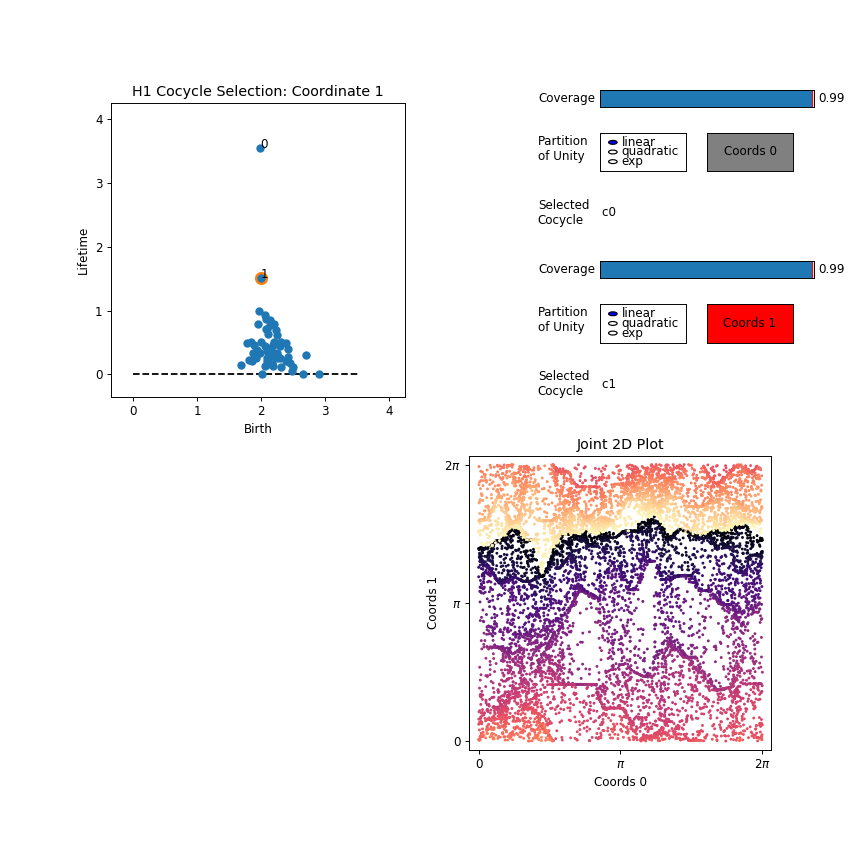

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from dreimac import CircularCoords, set_3dplot_equalaspect

prime = 41
np.random.seed(2)
N = 10000
R = 5
r = 2
X = np.zeros((N, 3))
s = np.random.rand(N)*2*np.pi
t = np.random.rand(N)*2*np.pi
t = 2*np.pi*t
X[:, 0] = (R + r*np.cos(s))*np.cos(t)
X[:, 1] = (R + r*np.cos(s))*np.sin(t)
X[:, 2] = r*np.sin(s)

cc = CircularCoords(X, 100, prime = prime)
f = s
def plot_torus(ax):
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=f, cmap='magma_r')
    set_3dplot_equalaspect(ax, X)
cc.plot_torii(f, coords_info=2, plots_in_one=2)

## Example 2: 2 Circles


<IPython.core.display.Javascript object>


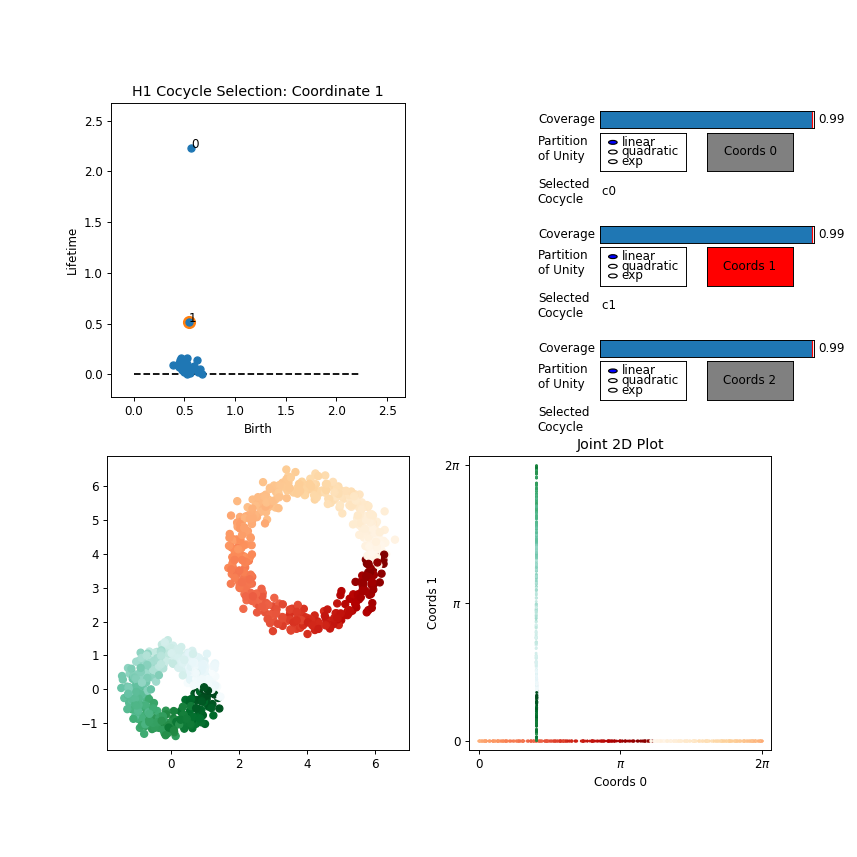

In [4]:
# Sample two noisy circles
prime = 41
np.random.seed(0)
N = 500
X = np.zeros((N*2, 2))
t = np.linspace(0, 1, N+1)[0:N]**1.2
t = 2*np.pi*t
X[0:N, 0] = np.cos(t)
X[0:N, 1] = np.sin(t)
X[N::, 0] = 2*np.cos(t) + 4
X[N::, 1] = 2*np.sin(t) + 4
X = X + 0.2*np.random.randn(X.shape[0], 2)

# Come up with different colors for each circle
fscaled = t - np.min(t)
fscaled = fscaled/np.max(fscaled)
c = plt.get_cmap('BuGn')
C1 = c(np.array(np.round(fscaled*255), dtype=np.int32))[:, 0:3]
c = plt.get_cmap('OrRd')
C2 = c(np.array(np.round(fscaled*255), dtype=np.int32))[:, 0:3]
C = np.concatenate((C1, C2), axis=0)

perm = np.random.permutation(X.shape[0])
X = X[perm, :]
C = C[perm, :]

def plot_circles(ax):
    ax.scatter(X[:, 0], X[:, 1], c=C)

cc = CircularCoords(X, 100, prime = prime)
cc.plot_torii(C, coords_info=2, plots_in_one=3, lowerleft_plot=plot_circles)